In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

In [2]:
from enum import Enum
class Products(Enum):
    jacket = 0
    shirts = 1
    shoes = 2
    tshirts = 3
    jeans = 4

In [3]:
jacket_data = pd.read_csv("Data/all_collected_data_Jackets.csv", index_col= 0).iloc[:,1:]
shirts_data = pd.read_csv("Data/all_collected_data_shirts.csv", index_col= 0).iloc[:,1:]
shoes_data = pd.read_csv("Data/all_collected_data_shoes.csv", index_col= 0).iloc[:,1:]
tshirts_data = pd.read_csv("Data/all_collected_data_Tshirts.csv", index_col= 0).iloc[:,1:]
jeans_data = pd.read_csv("Data/all_collected_data_jeans.csv", index_col= 0).iloc[:,1:]

In [4]:
all_data = [jacket_data, shirts_data, shoes_data, tshirts_data, jeans_data]

In [5]:
def format_input(dataset):
    for col in dataset:
        dataset[col] = dataset[col].str.replace("\n","")
    dataset["product_brand"] = dataset["product_brand"].str.replace("Visit the ","").str.replace("Store","").str.replace("Brand: ","")
    
    float_regex = "[1-9][0-9]*\.?[0-9]*"
    dataset["product_price"] = dataset["product_price"].apply(lambda x: float(re.findall(float_regex, x)[0]) if re.search(float_regex,x) else None)
    dataset["product_star_rating"] = dataset["product_star_rating"].apply(lambda x: float(re.findall(float_regex, x)[0]) if re.search(float_regex,x) else None)
    return dataset

In [6]:
for data in all_data:
    format_input(data)

In [7]:
def get_summary_statistic(data, product_type):
    agg = data.groupby("product_name")
    number_of_reviews = agg.count().iloc[:,0]
    average_rating_of_reviews = agg.mean("rating_of_review").iloc[:,0]
    summary = data.drop(["review","rating_of_review"], axis=1).drop_duplicates().set_index("product_name")
    summary["number_of_reviews"] = number_of_reviews
    summary["average_rating_of_reviews"] = average_rating_of_reviews
    summary["product_type"] = product_type
    return summary

In [8]:
summary_statistic = pd.DataFrame()
for product in Products:
    summary_statistic = pd.concat([summary_statistic, get_summary_statistic(all_data[product.value],product.name)])

## Summary statistics

In [9]:
summary_statistic.drop("average_rating_of_reviews", axis=1)

,product_brand,product_star_rating,product_price,number_of_reviews,product_type
product_name,,,,,
OJASS Full Sleeve Solid Men's Black Bomper Jacket,OJASS,3.8,799.0,406,jacket
Scott International Men's Solid Wind Cheater Jacket,Scott International,3.5,549.0,93,jacket
TB Trybuy.in Exclusive Designer Linen Solid Casual White Shirt for Men,TB Trybuy.in,3.6,699.0,8,shirts
Red Tape Men's Checkered Regular Fit Casual Shirt,Red Tape,4.0,512.0,11,shirts
Shaftesbury London Premium Cotton Slim Fit Shirt,Shaftesbury London,3.7,799.0,24,shirts
Dennis Lingo Men's Striped Slim Fit Cotton Casual Shirt,Dennis Lingo,2.9,699.0,81,shirts
Nidhi Sequence Men's Rayon Cotton Lining Digital Printed Stitched Half Sleeve Shirt,Nidhi,4.6,615.0,2,shirts
Amazon Brand - Symbol Men's Slim Fit Shirt,Amazon Brand - Symbol,3.9,509.0,2,shirts
Amazon Brand - House & Shields Men's Regular Casual Shirt,Amazon Brand - House & Shields,3.7,348.0,20,shirts


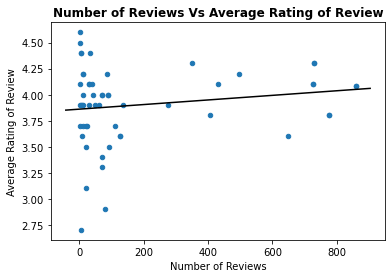

In [10]:
scatter_plot = summary_statistic.plot.scatter("number_of_reviews", "average_rating_of_reviews")
model1 = sm.OLS(summary_statistic["average_rating_of_reviews"], sm.add_constant(summary_statistic["number_of_reviews"])).fit()
x = np.linspace(*scatter_plot.get_xlim()).T
pltline = plt.plot(x, model1.predict(sm.add_constant(x)), '-k')

plt.title('Number of Reviews Vs Average Rating of Review',fontweight="bold")
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating of Review')
plt.show()

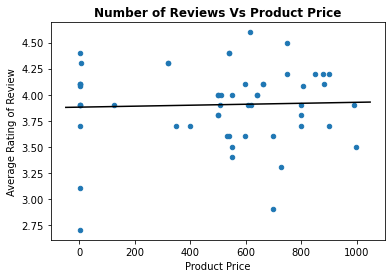

In [11]:
scatter_plot = summary_statistic.plot.scatter("product_price", "average_rating_of_reviews")
model1 = sm.OLS(summary_statistic["average_rating_of_reviews"], sm.add_constant(summary_statistic["product_price"])).fit()
x = np.linspace(*scatter_plot.get_xlim()).T
pltline = plt.plot(x, model1.predict(sm.add_constant(x)), '-k')

plt.title('Number of Reviews Vs Product Price',fontweight="bold")
plt.xlabel('Product Price')
plt.ylabel('Average Rating of Review')
plt.show()

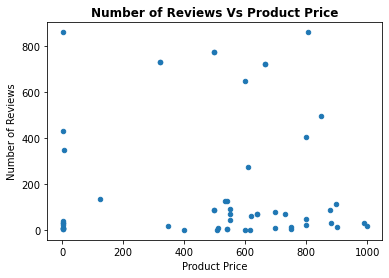

In [12]:
scatter_plot = summary_statistic.plot.scatter("product_price", "number_of_reviews")

plt.title('Number of Reviews Vs Product Price',fontweight="bold")
plt.xlabel('Product Price')
plt.ylabel('Number of Reviews')
plt.show()

The product from some brands have more avaerage number of reviews.
Our analysis maybe bias towards those brands

In [13]:
#plot the number of reviews for top 10 most popular brands vs other brands
number_of_reviews_per_brand = summary_statistic.groupby("product_brand").mean()["number_of_reviews"]
number_of_reviews_per_brand = number_of_reviews_per_brand.sort_values(ascending=False)

other_brand_index = number_of_reviews_per_brand.index.isin(number_of_reviews_per_brand.head(10).index)
other_brand_average = number_of_reviews_per_brand[~other_brand_index].mean()

data_to_plot = number_of_reviews_per_brand.head(10)
data_to_plot = data_to_plot.append(pd.Series([other_brand_average], index=["Other brands"]))

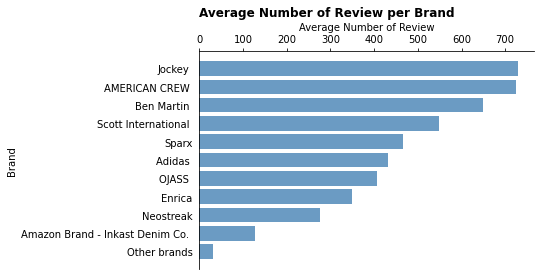

In [14]:
data_to_plot = data_to_plot.sort_values()
fig, ax = plt.subplots()
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(left = False)

plt.barh(data_to_plot.index, data_to_plot, facecolor='steelblue', alpha=0.8)
plt.title('Average Number of Review per Brand', loc='left',fontweight="bold")
plt.ylabel('Brand')
plt.xlabel('Average Number of Review')
plt.show()